# Speech Features
Analizzare uno speech file, plottando:
- la short time energy
- la short time magnitude
- la short time zero crossing
Scegliere dimensioni delle finestre appropriate, window shifts, window types (hamming, hann, rettangolare)

In [1]:
import numpy as np 
import scipy.signal.windows as windows
import matplotlib.pyplot as plt
import sys
import math

In [2]:
def compute_short_time_energy(signal, frame_length, hop_size, window_type):
    # per calcolare il numero di finestre devo fare (lunghezza segnale - lunghezza frame)/(frame hop, sovrapposizione)
    num_frames = int(np.floor((len(signal)-frame_length)/hop_size)+1)
    print(f"Num frames: {num_frames}")
    energy = np.zeros(num_frames)
    # scelgo la finestra da usare 
    if window_type == 'rectangular':
        window = np.ones(frame_length) 
    elif window_type == 'hamming':
        window = windows.hamming(frame_length)
    elif window_type == 'hann':
        window = windows.hann(frame_length)
    else:
        raise ValueError("finestra non valida")
    for i in range(num_frames):
        start = i * hop_size
        end = min(start+frame_length, len(signal))
        frame = np.zeros(frame_length)
        frame[:end-start] = signal[start:end] # riempio il frame, eventualmente con del padding
        frame = frame * window # applico la finestra
        energy[i] = np.sum(frame ** 2)
    return energy

In [3]:
def compute_short_time_magnitude(signal, frame_length, hop_size, window_type):
    # per calcolare il numero di finestre devo fare (lunghezza segnale - lunghezza frame)/(frame hop, sovrapposizione)
    num_frames = int(np.floor((len(signal)-frame_length)/hop_size)+1)
    print(f"Num frames: {num_frames}")
    magnitude = np.zeros(num_frames)
    # scelgo la finestra da usare 
    if window_type == 'rectangular':
        window = np.ones(frame_length) 
    elif window_type == 'hamming':
        window = windows.hamming(frame_length)
    elif window_type == 'hann':
        window = windows.hann(frame_length)
    else:
        raise ValueError("finestra non valida")
    for i in range(num_frames):
        start = i * hop_size
        end = min(start+frame_length, len(signal))
        frame = np.zeros(frame_length)
        frame[:end-start] = signal[start:end] # riempio il frame, eventualmente con del padding
        frame = np.abs(frame) * window # applico la finestra
        magnitude[i] = np.sum(frame)
    return magnitude

In [4]:
def compute_short_time_zerocrossing(signal, frame_length, hop_size, window_type):
    # per calcolare il numero di finestre devo fare (lunghezza segnale - lunghezza frame)/(frame hop, sovrapposizione)
    num_frames = int(np.floor((len(signal)-frame_length)/hop_size)+1)
    print(f"Num frames: {num_frames}")
    zc = np.zeros(num_frames)
    # scelgo la finestra da usare 
    if window_type == 'rectangular':
        window = np.ones(frame_length) 
    elif window_type == 'hamming':
        window = windows.hamming(frame_length)
    elif window_type == 'hann':
        window = windows.hann(frame_length)
    else:
        raise ValueError("finestra non valida")
    for i in range(num_frames):
        start = i * hop_size
        end = min(start+frame_length, len(signal))
        frame = np.zeros(frame_length)
        frame[:end-start] = signal[start:end] # riempio il frame, eventualmente con del padding
        frame = frame * window # applico la finestra
        zcr = 0.5 * np.abs(np.diff(np.sign(frame))) # calcolo lo zero crossing rate
        zc[i] = np.sum(zcr)
    return zc

In [5]:
# carico la traccia audio 
import librosa 
wav_file = '1.wav'
signal, sr = librosa.load(wav_file, sr=None)
print(signal.shape)
print(sr)

(62362,)
16000


La frequenza di campionamento è di 16kHz

In [6]:
frame_length = int(0.05 * sr) # 50ms window, 800 campioni
print(frame_length)
hop_size = int(0.02 * sr) # 20ms hop_length, hop di 320 campioni
print(hop_size)

800
320


In [7]:
def compute_and_plot(signal, sr, frame_length, hop_size, window_type):
    # short time magnitude
    ste_mag = compute_short_time_magnitude(signal, frame_length, hop_size, window_type)
    # short time energy
    ste_eng = compute_short_time_energy(signal, frame_length, hop_size, window_type)
    # short tme zero crossing
    ste_zcr = compute_short_time_zerocrossing(signal, frame_length, hop_size, window_type)
    # tempo normalizzato
    t = np.linspace(0, ste_eng.shape[0]/sr, len(ste_eng))
    plt.figure(figsize=(20,12))
    time = np.linspace(0, len(signal)/sr, len(signal))
    # analisi della forma d'onda
    plt.subplot(4,1,1)
    plt.plot(time, signal, color='black')
    plt.title("Speech Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.ylim(np.min(signal), np.max(signal))
    # plotting della Short Time Energy
    plt.subplot(4,1,2)
    plt.plot(t, ste_eng, color='red')
    plt.title(f"Shor Time Energy - window={window_type}, frame_length={frame_length}, hop={hop_size}")
    plt.xlabel("Frame Index")
    plt.ylabel("Energy")
    # plt.xlim(0, math.ceil(ste_eng.shape[0]/sr))
    plt.ylim(0, 0.5)
    # plotting della ShortTime Magnitude
    plt.subplot(4,1,3)
    plt.plot(t, ste_mag, color='blue')
    plt.title(f"Shor Time Magnitude - window={window_type}, frame_length={frame_length}, hop={hop_size}")
    plt.xlabel("Frame Index")
    plt.ylabel("Magnitude")
    # plt.xlim(0, math.ceil(ste_mag.shape[0]/sr))
    plt.ylim(0, np.max(ste_mag))
    # plotting della Short Time Zero Crossing
    plt.subplot(4,1,4)
    plt.plot(t, ste_zcr, color='orange')
    plt.title(f"Shor Time Zero Crossing - window={window_type}, frame_length={frame_length}, hop={hop_size}")
    plt.xlabel("Frame Index")
    plt.ylabel("ZCR")
    # plt.xlim(0, math.ceil(ste_zcr.shape[0]/sr))
    plt.ylim(0, np.max(ste_zcr))
    plt.plot()

Adesso proviamo al variare dei valori

Num frames: 3873
Num frames: 3873
Num frames: 3873


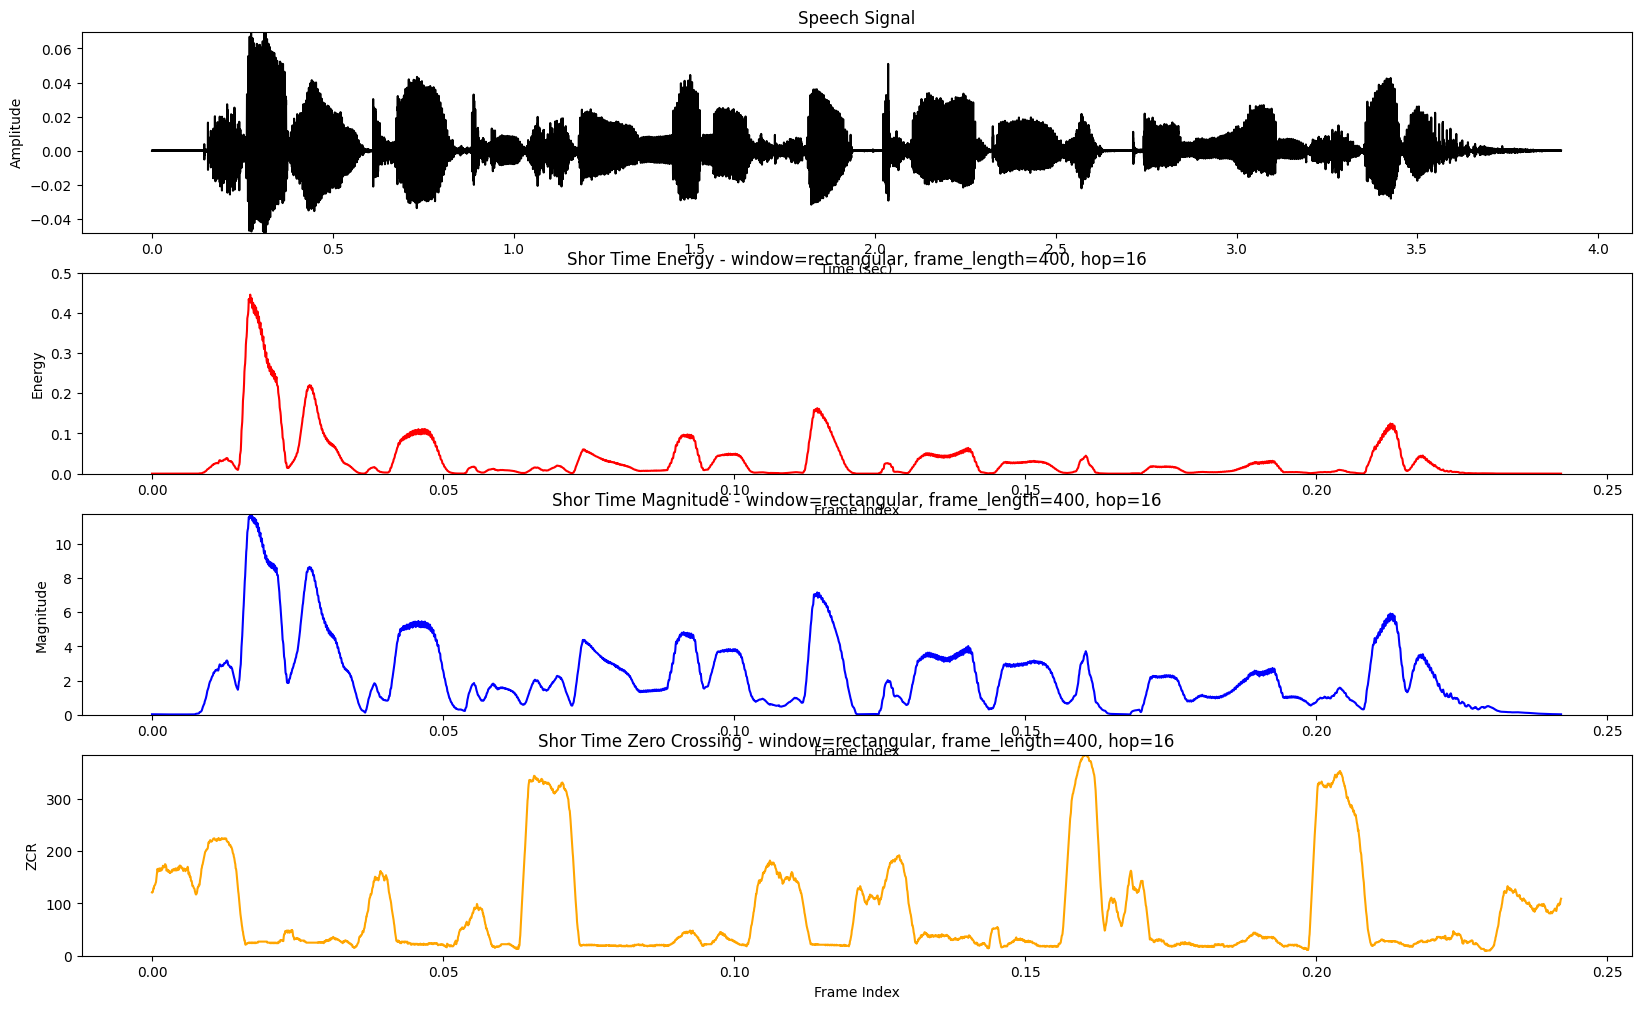

In [8]:
# frame_lengths = [0.05, 0.04, 0.03]
# hop_sizes = [0.02, 0.01]
# window_types=['rectangular','hamming', 'hann']

# for fl in frame_lengths:
#     for hs in hop_sizes:
#         frame_length = int(fl * sr) # 50ms window, 800 campioni
#         print(frame_length)
#         hop_size = int(hs * sr) # 20ms hop_length, hop di 320 campioni
#         print(hop_size)
#         for wt in window_types:
#             compute_and_plot(signal, sr, frame_length, hop_size, wt)

frame_length = int(0.025 * sr) #25ms
hop_size = int(0.001 * sr) #1ms hop di 1 secondo
window_type = 'rectangular'
compute_and_plot(signal, sr, frame_length, hop_size, window_type)


# Pitch Detection

Il pitch period può essere stimato a partire dalla locale del primo massimo non zero nella funzione di autocorrelazione. Implementare quindi un pitch tracker basato su funzione di autocorrelazione (STACF - Short Time Auto Correlation Function) usando una analisi a finesre di 30ms, e uno shift di 10ms

Con narrowband (finestra lunga): la funzione di autocorrelazione mostra picchi più netti e stabili, utile per segnali periodici stazionari (es. vocali lunghe)

Con wideband (finestra corta): la STACF è più rumorosa, ma utile per segnali transitori o pitch instabili

In [9]:
import numpy as np 
import librosa
import matplotlib.pyplot as plt
import scipy.signal.windows as windows
from matplotlib.ticker import MultipleLocator

In [10]:
def stacf(frame):
    frame = frame - np.mean(frame) # rimuove la DC
    result = np.correlate(frame, frame, mode='full') # effettua la autocorrelazione per ogni valore di LAG k
    return result[result.size //2:] # dato che è PARI, ritorno solo i valori positivi

Prima vediamo cosa succede con un singolo frame

Numero campioni per finestra: 240
Numero campioni di step: 80
46
(240,)


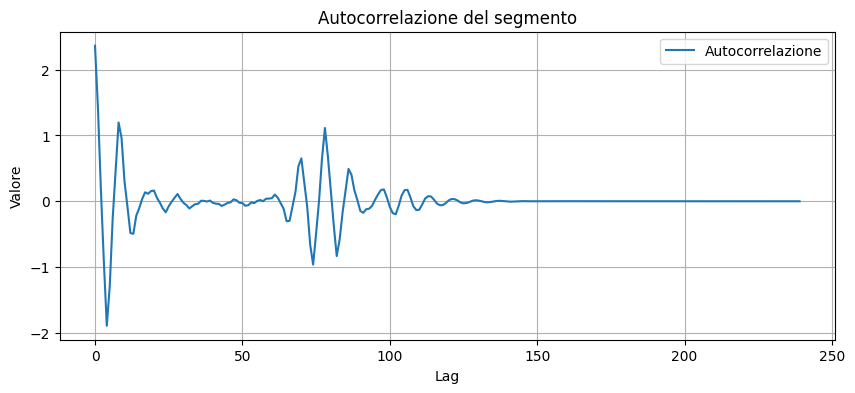

In [11]:
fs = 8e3 # 8kHz
T_w = 30e-3 # 30ms
T_s = 10e-3 # 10 ms

def windowing(data, t_win=T_w, t_step=T_s, fs=fs):
    # ogni finestra deve avere un numero di campioni pari a t_win * fs
    n_win = int(t_win * fs)
    # dopodiché devo iniziare ad estrarre a partire dal primo campione, spostandomi ogni volta di
    n_step = int(t_step * fs)
    print(f"Numero campioni per finestra: {n_win}")
    print(f"Numero campioni di step: {n_step}")
    n_frames = int((data.shape[0] - n_win) / n_step)
    windows = []
    for i in range(n_frames):
        start_index = i * n_step
        end_index = start_index + n_win
        win = data[start_index:end_index] * np.hamming(n_win) # uso la finestra di hamming
        windows.append(win)
    return windows


filename = "audio/aa-pout-105Hz-8kHz.wav"
signal, sr = librosa.load(filename, sr=fs)
segmenti = windowing(signal)
print(len(segmenti))
segmento_1 = segmenti[0]
print(segmento_1.shape)
ac = stacf(segmento_1)

# Asse temporale, lo stampo come lag
lag = np.arange(0, len(segmento_1))
# Plot
plt.figure(figsize=(10, 4))
plt.plot(lag, ac, label="Autocorrelazione") 
# prendo solo la parte positiva dell'autocorrelazione dato che è simmetrica
plt.xlabel("Lag")
plt.ylabel("Valore")
plt.title("Autocorrelazione del segmento")
plt.legend()
plt.grid()
plt.show()

In [12]:
# Limiti basati sulle frequenze desiderate
max_freq = 500
min_freq = 50
min_lag = int(fs / max_freq)
max_lag = int(fs / min_freq)
print(f"Intervallo: {min_lag}-{max_lag}")

Intervallo: 16-160


In [13]:
# Trova il massimo nella regione valida
ac[:min_lag] = 0
peak_index = np.argmax(ac[min_lag:max_lag]) + min_lag
pitch_freq = fs / peak_index  # Converti lag in frequenza
print(f"Pitch freq: {pitch_freq}")

Pitch freq: 102.56410256410257


In [14]:
def compute_pitch(signal, sr, frame_size=1024, hop_size=512, fmin=50, fmax=500):
    pitches = []
    times = []
    for i in range(0, len(signal)-frame_size, hop_size):
        frame = signal[i:i+frame_size]
        frame = frame * windows.hamming(frame_size) # applico la finestra di hamming
        acf = stacf(frame)
        # trova il primo picco dopo il lag 0
        min_lag= sr // fmax
        max_lag = sr // fmin 
        acf[:min_lag] = 0 # ignora i bassi lag
        peak_index = np.argmax(acf[:max_lag])
        if acf[peak_index] > 0:
            pitch = sr / peak_index 
        else:
            pitch = 0
        pitches.append(pitch)
        times.append(i/sr)
    return np.array(times), np.array(pitches)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46]
[421.05263158 205.12820513 205.12820513 205.12820513 205.12820513
 205.12820513 205.12820513 205.12820513 205.12820513 205.12820513
 205.12820513 205.12820513 205.12820513 205.12820513 205.12820513
 205.12820513 205.12820513 205.12820513 205.12820513 205.12820513
 205.12820513 205.12820513 205.12820513 205.12820513 205.12820513
 205.12820513 205.12820513 205.12820513 205.12820513 205.12820513
 205.12820513 205.12820513 205.12820513 205.12820513 205.12820513
 205.12820513 205.12820513 205.12820513 205.12820513 205.12820513
 205.12820513 205.12820513 205.12820513 205.12820513 205.12820513
 205.12820513 205.12820513]


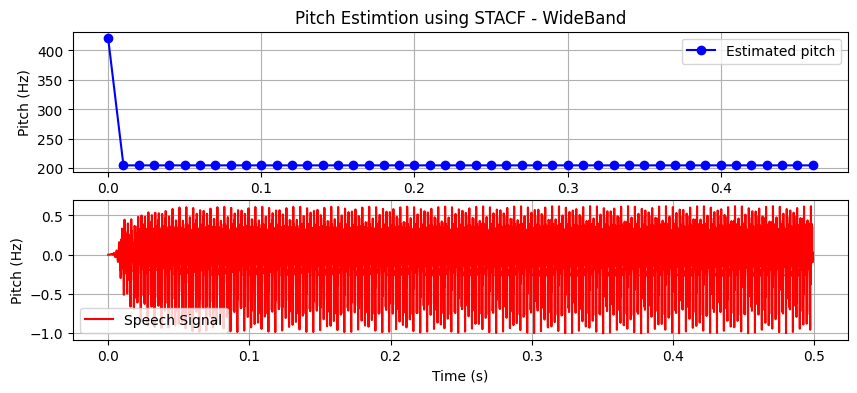

In [15]:
signal, sr = librosa.load('./audio/ih-pout-410Hz-8kHz.wav', sr=None) # caricmento di un segnale
times, pitches = compute_pitch(signal, sr, frame_size=240, hop_size=80) # analisi wideband con finestra con pochi campioni
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(times, pitches, label="Estimated pitch", color='b', marker='o')
print(times)
print(pitches)
plt.xlabel("Time (s)")
plt.ylabel('Pitch (Hz)')
plt.title("Pitch Estimtion using STACF - WideBand")
plt.legend()
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(np.linspace(0, len(signal)/sr, len(signal)), signal, label="Speech Signal", color='r')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend()
plt.grid(True)
plt.show()

In questo caso una analisi wideband non riesce a catturare il pitch, proviamo con una narrowband

[0.    0.032 0.064 0.096 0.128 0.16  0.192 0.224 0.256 0.288 0.32  0.352
 0.384 0.416]
[205.12820513 205.12820513 205.12820513 205.12820513 205.12820513
 205.12820513 205.12820513 205.12820513 205.12820513 205.12820513
 205.12820513 205.12820513 205.12820513 205.12820513]


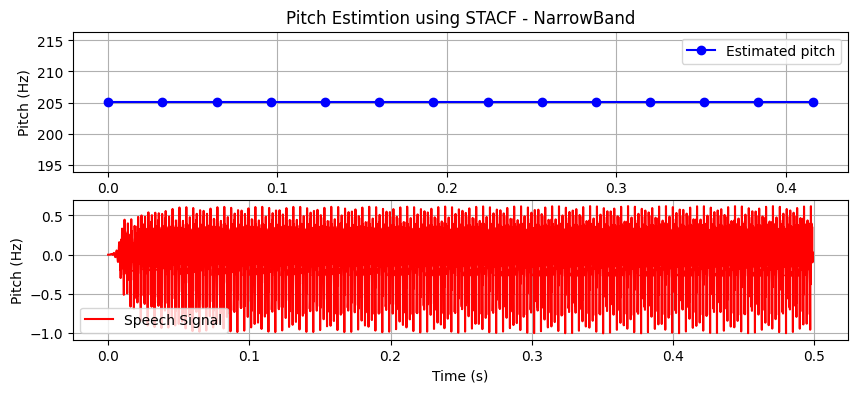

In [16]:
signal, sr = librosa.load('./audio/ih-pout-410Hz-8kHz.wav', sr=None) # caricmento di un segnale
times, pitches = compute_pitch(signal, sr, frame_size=512, hop_size=256) # analisi wideband con finestra con pochi campioni
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(times, pitches, label="Estimated pitch", color='b', marker='o')
print(times)
print(pitches)
plt.xlabel("Time (s)")
plt.ylabel('Pitch (Hz)')
plt.title("Pitch Estimtion using STACF - NarrowBand")
plt.legend()
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(np.linspace(0, len(signal)/sr, len(signal)), signal, label="Speech Signal", color='r')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend()
plt.grid(True)
plt.show()

Una analisi wideband riesce a stimare alti pitch rispetto ad una narrowband

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46]
[102.56410256 102.56410256 102.56410256 103.8961039  103.8961039
 103.8961039  103.8961039  103.8961039  103.8961039  103.8961039
 103.8961039  103.8961039  103.8961039  103.8961039  103.8961039
 103.8961039  103.8961039  103.8961039  103.8961039  103.8961039
 103.8961039  103.8961039  103.8961039  103.8961039  103.8961039
 103.8961039  103.8961039  103.8961039  103.8961039  103.8961039
 103.8961039  103.8961039  103.8961039  103.8961039  103.8961039
 103.8961039  103.8961039  103.8961039  103.8961039  103.8961039
 103.8961039  103.8961039  103.8961039  103.8961039  103.8961039
 103.8961039  103.8961039 ]


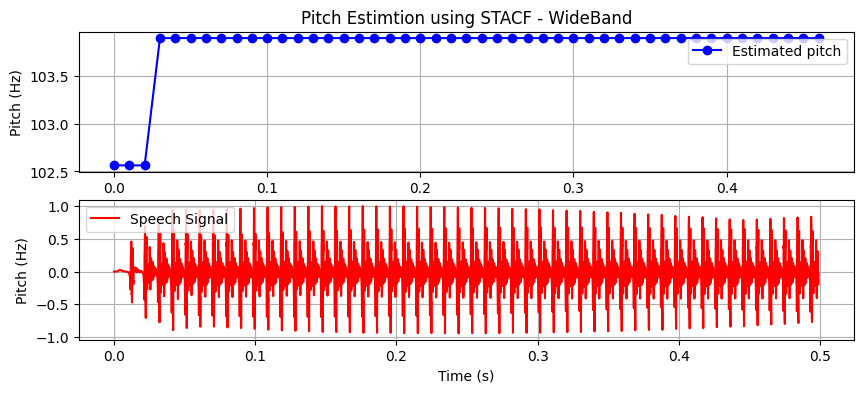

[0.    0.032 0.064 0.096 0.128 0.16  0.192 0.224 0.256 0.288 0.32  0.352
 0.384 0.416]
[102.56410256 103.8961039  103.8961039  103.8961039  103.8961039
 103.8961039  103.8961039  103.8961039  103.8961039  103.8961039
 103.8961039  103.8961039  103.8961039  103.8961039 ]


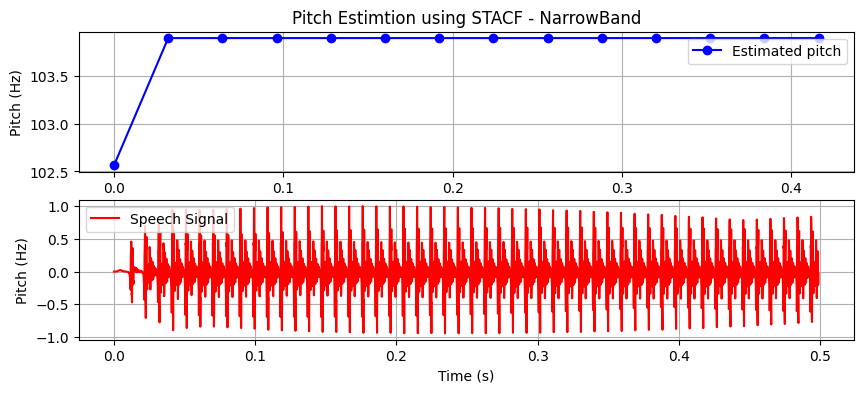

In [17]:
signal, sr = librosa.load('./audio/aa-pout-105Hz-8kHz.wav', sr=None) # caricmento di un segnale
times, pitches = compute_pitch(signal, sr, frame_size=240, hop_size=80) # analisi wideband con finestra con pochi campioni
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(times, pitches, label="Estimated pitch", color='b', marker='o')
print(times)
print(pitches)
plt.xlabel("Time (s)")
plt.ylabel('Pitch (Hz)')
plt.title("Pitch Estimtion using STACF - WideBand")
plt.legend()
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(np.linspace(0, len(signal)/sr, len(signal)), signal, label="Speech Signal", color='r')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend()
plt.grid(True)
plt.show()

signal, sr = librosa.load('./audio/aa-pout-105Hz-8kHz.wav', sr=None) # caricmento di un segnale
times, pitches = compute_pitch(signal, sr, frame_size=512, hop_size=256) # analisi wideband con finestra con pochi campioni
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(times, pitches, label="Estimated pitch", color='b', marker='o')
print(times)
print(pitches)
plt.xlabel("Time (s)")
plt.ylabel('Pitch (Hz)')
plt.title("Pitch Estimtion using STACF - NarrowBand")
plt.legend()
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(np.linspace(0, len(signal)/sr, len(signal)), signal, label="Speech Signal", color='r')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend()
plt.grid(True)
plt.show()

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46]
[266.66666667 258.06451613 258.06451613 258.06451613 258.06451613
 258.06451613 258.06451613 258.06451613 258.06451613 258.06451613
 258.06451613 258.06451613 258.06451613 258.06451613 258.06451613
 258.06451613 258.06451613 258.06451613 258.06451613 258.06451613
 258.06451613 258.06451613 258.06451613 258.06451613 258.06451613
 258.06451613 258.06451613 258.06451613 258.06451613 258.06451613
 258.06451613 258.06451613 258.06451613 258.06451613 258.06451613
 258.06451613 258.06451613 258.06451613 258.06451613 258.06451613
 258.06451613 258.06451613 258.06451613 258.06451613 258.06451613
 258.06451613 258.06451613]


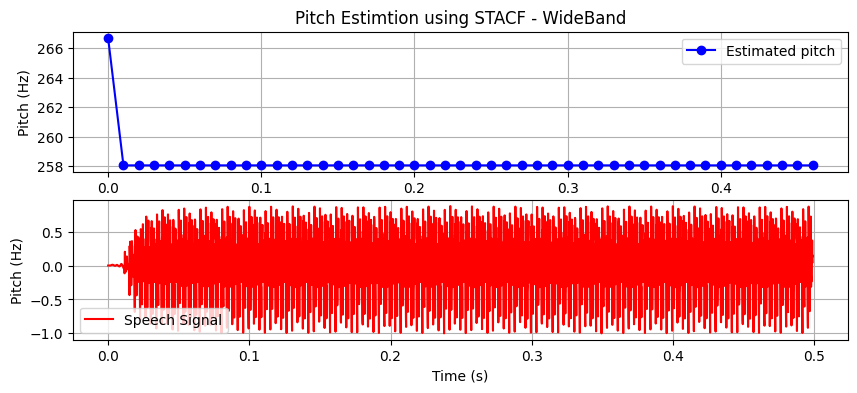

[0.    0.032 0.064 0.096 0.128 0.16  0.192 0.224 0.256 0.288 0.32  0.352
 0.384 0.416]
[258.06451613 258.06451613 258.06451613 258.06451613 258.06451613
 258.06451613 258.06451613 258.06451613 258.06451613 258.06451613
 258.06451613 258.06451613 258.06451613 258.06451613]


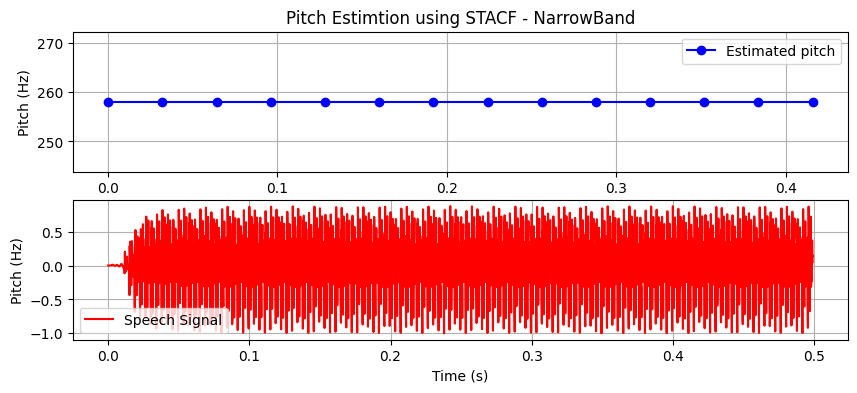

In [18]:
signal, sr = librosa.load('./audio/ae-pout-255Hz-8kHz.wav', sr=None) # caricmento di un segnale
times, pitches = compute_pitch(signal, sr, frame_size=240, hop_size=80) # analisi wideband con finestra con pochi campioni
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(times, pitches, label="Estimated pitch", color='b', marker='o')
print(times)
print(pitches)
plt.xlabel("Time (s)")
plt.ylabel('Pitch (Hz)')
plt.title("Pitch Estimtion using STACF - WideBand")
plt.legend()
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(np.linspace(0, len(signal)/sr, len(signal)), signal, label="Speech Signal", color='r')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend()
plt.grid(True)
plt.show()

signal, sr = librosa.load('./audio/ae-pout-255Hz-8kHz.wav', sr=None) # caricmento di un segnale
times, pitches = compute_pitch(signal, sr, frame_size=512, hop_size=256) # analisi wideband con finestra con pochi campioni
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(times, pitches, label="Estimated pitch", color='b', marker='o')
print(times)
print(pitches)
plt.xlabel("Time (s)")
plt.ylabel('Pitch (Hz)')
plt.title("Pitch Estimtion using STACF - NarrowBand")
plt.legend()
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(np.linspace(0, len(signal)/sr, len(signal)), signal, label="Speech Signal", color='r')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend()
plt.grid(True)
plt.show()

# VUS Detector
Possiamo realizzare un discriminatore per frames Voiced/Unvoiced e Silence (VUS). Usiamo un frame rate di 0.01 e una finestra di analisi di 0.03. Il VUS dovrebbe basarsi sulla shrt time zero crossing rate (ST-ZCT) e sulla Short Time Aveged Short Time Energy (ST-AE)
Fissiamo anche le soglie

In [19]:
# VUS detector
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import interp1d
import scipy.signal as signal 
from matplotlib.ticker import MaxNLocator

In [20]:
def vus(s, frame_size, hop_size):
    s = s - np.mean(s) # rimuovo la componente in continua DC
    frame_length = len(s)
    win = windows.hamming(frame_size) # definisco la finestra di hamming
    Nfr = int(np.floor((frame_length-frame_size)/hop_size)+1) # numero di frames
    En = np.zeros(Nfr)
    ZCr = np.zeros(Nfr)
    T = np.zeros(Nfr)
    for i in range(Nfr):
        # per ogni frame devo calcolare l'energia e il Zero Crossing rate, oltre che salvare l'indice del frame che sto considernado
        start = i * hop_size
        end = start + frame_size
        frame = np.zeros(frame_size)
        frame[:end-start] = s[start:end]*win
        En[i] = np.sum(frame ** 2)/frame_size 
        ZCr[i] = np.sum(0.5*np.abs(np.diff(np.sign(frame))))
        T[i] = frame_size/2 + i*hop_size
    # soglie
    Ethres = np.mean(En)/2
    ZCRthres = (3/2)*np.mean(ZCr) - 0.3*np.std(ZCr)
    VUS = np.zeros(Nfr)
    for i in range(Nfr):
        if En[i] > Ethres:
            VUS[i] = 1.0 # voiced
        elif ZCr[i] < ZCRthres:
            VUS[i] = 0.0 # silence
        elif ZCr[i] > ZCRthres:
            VUS[i] = 0.5 # unvoiced
    return T, VUS

In [21]:
s, sr = librosa.load('./audio/H.22.16k.wav', sr=None)
s = s -  np.mean(s) # tolgo la DC
frame_rate = 0.01
frame_length = 0.03
frame_size = int(frame_length * sr)
hop_size = int(frame_rate*sr)
print(sr)
print(frame_size)
print(hop_size)

16000
480
160


In [22]:
s = s / np.max(np.abs(s)) # normalizzo tra [-1, 1]
T, VUS_values = vus(s, frame_size, hop_size)
T, index = np.unique(T, return_index=True)
print(T)
print(VUS_values)

[  240.   400.   560.   720.   880.  1040.  1200.  1360.  1520.  1680.
  1840.  2000.  2160.  2320.  2480.  2640.  2800.  2960.  3120.  3280.
  3440.  3600.  3760.  3920.  4080.  4240.  4400.  4560.  4720.  4880.
  5040.  5200.  5360.  5520.  5680.  5840.  6000.  6160.  6320.  6480.
  6640.  6800.  6960.  7120.  7280.  7440.  7600.  7760.  7920.  8080.
  8240.  8400.  8560.  8720.  8880.  9040.  9200.  9360.  9520.  9680.
  9840. 10000. 10160. 10320. 10480. 10640. 10800. 10960. 11120. 11280.
 11440. 11600. 11760. 11920. 12080. 12240. 12400. 12560. 12720. 12880.
 13040. 13200. 13360. 13520. 13680. 13840. 14000. 14160. 14320. 14480.
 14640. 14800. 14960. 15120. 15280. 15440. 15600. 15760. 15920. 16080.
 16240. 16400. 16560. 16720. 16880. 17040. 17200. 17360. 17520. 17680.
 17840. 18000. 18160. 18320. 18480. 18640. 18800. 18960. 19120. 19280.
 19440. 19600. 19760. 19920. 20080. 20240. 20400. 20560. 20720. 20880.
 21040. 21200. 21360. 21520. 21680. 21840. 22000. 22160. 22320. 22480.
 22640

In [23]:
new_T = np.arange(0, len(s), 1)
interpolator = interp1d(T, VUS_values[index], kind='linear', fill_value=0, bounds_error=False)
VUS_i = interpolator(new_T)
print(VUS_i)

[0. 0. 0. ... 0. 0. 0.]


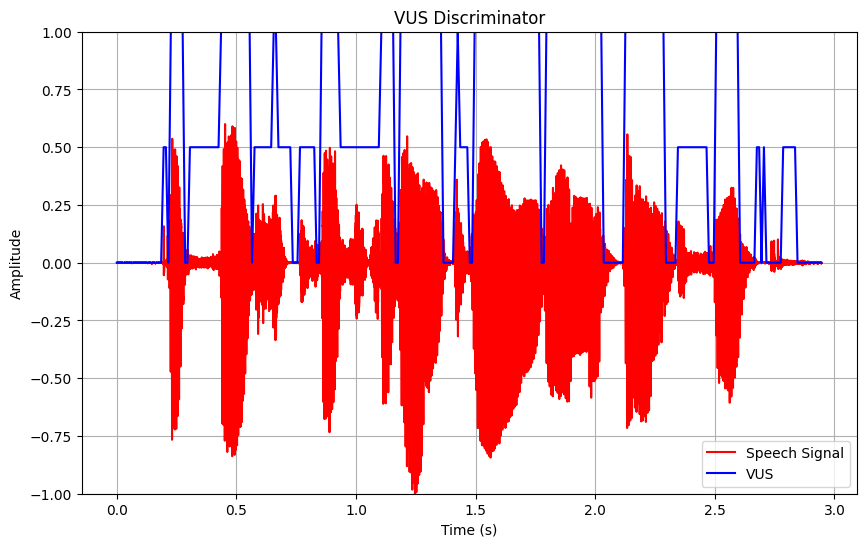

In [24]:
t = np.linspace(0, len(s)/sr, len(s))
plt.figure(figsize=(10,6))
plt.plot(t, s, label='Speech Signal', color='r')
plt.plot(t, VUS_i, label='VUS', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-1.0, 1.0)
plt.legend()
plt.grid(True)
plt.title('VUS Discriminator')
plt.show()

Riesco in questo caso a distinguere i periodi di Voiced, Unvoiced e di Silence

# Age-Gender Discriminator
Il segnale di pitch contiene molte infrmazioni rilevanti ed importanti, tra cui informazioni sul seso e sull'età. Generalmente, possiamo usare un pitch tracker basato su autocorrelazione per poter realizzare un detector discriminatore, dove sulla base del pitch rilevato facciamo un pitch contoour sul segnale di partenza dove andiamo a distinguere "male", "female" e "child". Generalmente:
- un adulto ha un pitch tra 70 e 250Hz, con un uomo tra 70 e 150, mentre le donne tra 160 e 250
- un child ha un pitch tra 300 e 500Hz

In [25]:
import numpy as np 
import librosa
import matplotlib.pyplot as plt
import scipy.signal.windows as windows
import scipy.signal as signal 
from matplotlib.ticker import MultipleLocator

Per realizzare il discriminatore posso pensare di usare la funzione di autocorrelazione definita precedentemente, qundi possiamo andare a calcoalre il pitch per un determinato segnale

In [26]:
s, sr = librosa.load('./audio/H.22.16k.wav', sr=None)
print(s.shape)
print(sr)

(47126,)
16000


In [27]:
s = s / np.max(np.abs(s)) # normalizza tra [-1, 1]
T, f_acf = compute_pitch(s, sr, frame_size=240, hop_size=80)
T, index = np.unique(T, return_index=True)
new_T = np.arange(0, len(s), 1)
interpolator = interp1d(T, f_acf[index], kind='cubic', fill_value='extrapolate')
f_acf_i = interpolator(new_T)

In [28]:
f_acf

array([500.        , 146.78899083, 155.33980583, 500.        ,
       500.        , 470.58823529, 484.84848485, 457.14285714,
       500.        , 500.        , 500.        , 500.        ,
       500.        , 500.        , 500.        , 500.        ,
       500.        , 500.        , 484.84848485, 500.        ,
       500.        ,  81.21827411, 500.        , 500.        ,
       500.        , 500.        , 500.        , 500.        ,
       500.        , 500.        , 500.        , 500.        ,
       500.        , 500.        , 500.        , 470.58823529,
       470.58823529, 372.09302326, 457.14285714, 457.14285714,
       163.26530612, 500.        , 250.        , 235.29411765,
       181.81818182, 500.        , 500.        , 500.        ,
       500.        , 172.04301075, 172.04301075, 172.04301075,
       170.21276596, 166.66666667, 161.61616162, 156.8627451 ,
       146.78899083, 145.45454545, 148.14814815, 153.84615385,
       153.84615385, 484.84848485, 266.66666667, 390.24

In [29]:
print(f_acf_i)

[ 5.00000000e+02  1.23076923e+02  1.46788991e+02 ... -1.45272825e+19
 -1.45282074e+19 -1.45291324e+19]


In [30]:
def agegenderdis(f_acf):
    f_acf_pos = f_acf[f_acf > 0]
    f_acf_male = f_acf_pos[(f_acf_pos >= 70) & (f_acf_pos <= 160)]
    f_acf_female = f_acf_pos[(f_acf_pos > 160) & (f_acf_pos <= 275)]
    f_acf_child = f_acf_pos[(f_acf_pos > 275) & (f_acf_pos <= 500)]
    print(f"Campioni di pitch: {len(f_acf_pos)}")
    print(f"Campioni che rientrano in MALE: {len(f_acf_male)}")
    print(f"Campioni che rientrano in FEMALE: {len(f_acf_female)}")
    print(f"Campioni che rientrano in CHILD: {len(f_acf_child)}")
    max_len = len(f_acf_male)
    result = 'Adult Male'
    if len(f_acf_female) > max_len:
        result = 'Adult Female'
        max_len = len(f_acf_female)
    if len(f_acf_child) > max_len:
        result = 'Child'
    print(f"The voice is: {result}")
    
agegenderdis(f_acf=f_acf)

Campioni di pitch: 587
Campioni che rientrano in MALE: 190
Campioni che rientrano in FEMALE: 178
Campioni che rientrano in CHILD: 219
The voice is: Child


./audio/H.22.16k.wav
(47126,)
16000
Campioni di pitch: 587
Campioni che rientrano in MALE: 190
Campioni che rientrano in FEMALE: 178
Campioni che rientrano in CHILD: 219
The voice is: Child


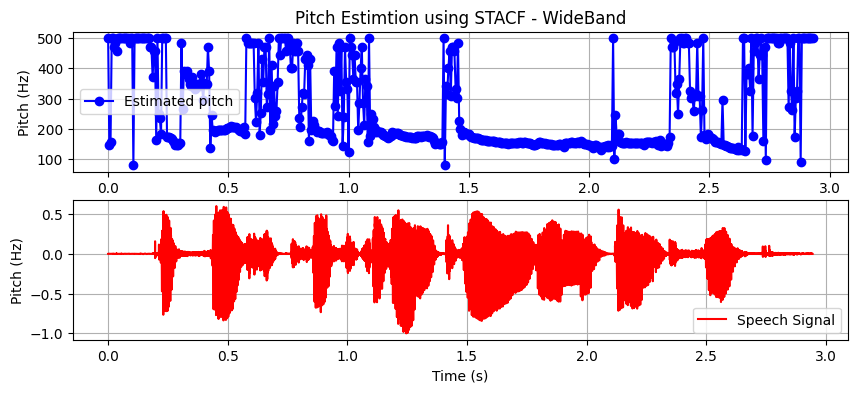

./audio/speech2_10k.wav
(20006,)
10000
Campioni di pitch: 248
Campioni che rientrano in MALE: 137
Campioni che rientrano in FEMALE: 59
Campioni che rientrano in CHILD: 52
The voice is: Adult Male


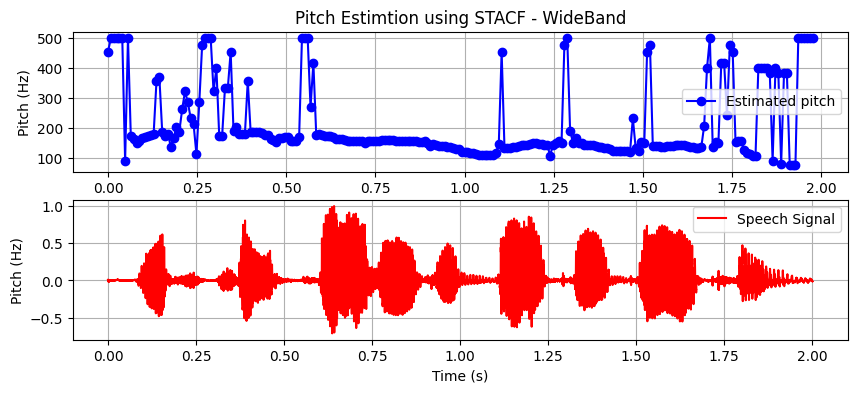

./audio/speech3_10k.wav
(24006,)
10000
Campioni di pitch: 298
Campioni che rientrano in MALE: 94
Campioni che rientrano in FEMALE: 175
Campioni che rientrano in CHILD: 29
The voice is: Adult Female


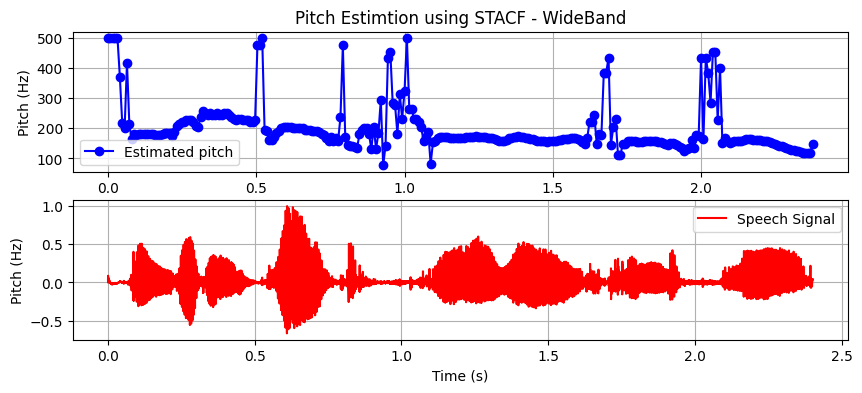

./audio/arctic_a0049-sin.wav
(64000,)
16000
Campioni di pitch: 797
Campioni che rientrano in MALE: 98
Campioni che rientrano in FEMALE: 107
Campioni che rientrano in CHILD: 592
The voice is: Child


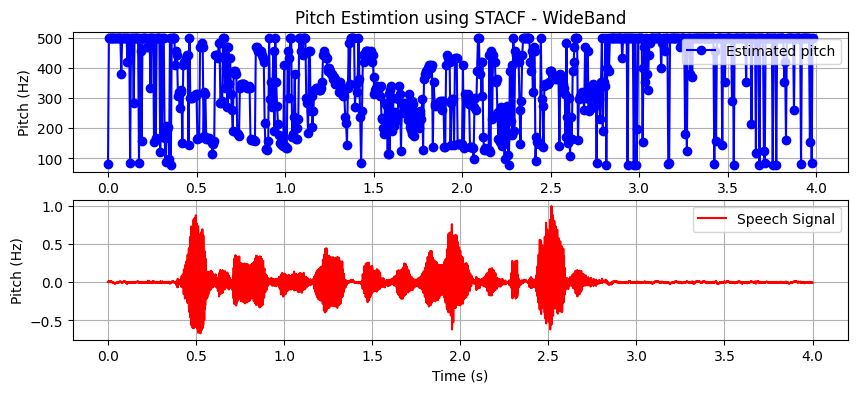

In [31]:
def PitchDiscriminator(filename='./audio/H.22.16k.wav'):
    print(filename)
    s, sr = librosa.load(filename, sr=None)
    print(s.shape)
    print(sr)
    s = s / np.max(np.abs(s)) # normalizza tra [-1, 1]
    T, f_acf = compute_pitch(s, sr, frame_size=240, hop_size=80)
    agegenderdis(f_acf=f_acf)
    plt.figure(figsize=(10,4))
    plt.subplot(2,1,1)
    plt.plot(T, f_acf, label="Estimated pitch", color='b', marker='o')
    # print(times)
    # print(pitches)
    plt.xlabel("Time (s)")
    plt.ylabel('Pitch (Hz)')
    plt.title("Pitch Estimtion using STACF - WideBand")
    plt.legend()
    plt.grid(True)
    plt.subplot(2,1,2)
    plt.plot(np.linspace(0, len(s)/sr, len(s)), s, label="Speech Signal", color='r')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (Hz)')
    plt.legend()
    plt.grid(True)
    plt.show()

PitchDiscriminator(filename='./audio/H.22.16k.wav')
PitchDiscriminator(filename='./audio/speech2_10k.wav')
PitchDiscriminator(filename='./audio/speech3_10k.wav')
PitchDiscriminator(filename='./audio/arctic_a0049-sin.wav')

Tuttavia, notiamo come il pitch tracker non sia funzionando proprio bene, dunque risolviamo andando a fare una unione tra VUS e Pitch Detector, in questo modo andiamo a classificare SOLO le regioni dove è presente del VOICED

# VUS e Pitch Tracker

In [32]:
def vus(s, frame_size, hop_size):
    s = s - np.mean(s) # rimuovo la componente in continua DC
    frame_length = len(s)
    win = windows.hamming(frame_size) # definisco la finestra di hamming
    Nfr = int(np.floor((frame_length-frame_size)/hop_size)+1) # numero di frames
    En = np.zeros(Nfr)
    ZCr = np.zeros(Nfr)
    T = np.zeros(Nfr)
    for i in range(Nfr):
        # per ogni frame devo calcolare l'energia e il Zero Crossing rate, oltre che salvare l'indice del frame che sto considernado
        start = i * hop_size
        end = start + frame_size
        frame = np.zeros(frame_size)
        frame[:end-start] = s[start:end]*win
        En[i] = np.sum(frame ** 2)/frame_size 
        ZCr[i] = np.sum(0.5*np.abs(np.diff(np.sign(frame))))
        T[i] = frame_size/2 + i*hop_size
    # soglie
    Ethres = np.mean(En)/2
    ZCRthres = (3/2)*np.mean(ZCr) - 0.3*np.std(ZCr)
    VUS = np.zeros(Nfr)
    for i in range(Nfr):
        if En[i] > Ethres:
            VUS[i] = 1.0 # voiced
        elif ZCr[i] < ZCRthres:
            VUS[i] = 0.0 # silence
        elif ZCr[i] > ZCRthres:
            VUS[i] = 0.5 # unvoiced
    return VUS

In [33]:
def acf_peak_picking(frame, sr, fmin=70, fmax=500):
    '''
    calcola il pitch per un determinato frame
    '''
    L = len(frame)
    np.set_printoptions(precision=4, suppress=False)
    corr = np.correlate(frame, frame, mode='full') # calcola per tutti i lag
    pos_corr = corr[corr.size //2: ] # solo la parte positiva
    up_thresh = 1/fmin
    low_thresh = 1/fmax 
    peaks, _ = signal.find_peaks(pos_corr)
    pks_value = pos_corr[peaks]
    locs = peaks/sr # trasforma la posizione di picchi in valori temporali
    valid_locs = locs[(locs >= low_thresh) & (locs <= up_thresh)]
    valid_peaks = pks_value[(locs >= low_thresh) & (locs <= up_thresh)]
    argmax = np.argmax(valid_peaks)
    f_0 = 1/valid_locs[argmax]
    return f_0

In [34]:
def improved_compute_pitch(s, sr, frame_size=240, hop_size=80, fmin=50, fmax=500):
    VUS = vus(s, frame_size=frame_size, hop_size=hop_size)
    s = s - np.mean(s)
    Nfr = int(np.floor((len(s)-frame_size)/hop_size)+1)
    f_acf = np.zeros(Nfr)
    T = np.zeros(Nfr)
    for i in range(Nfr):
        start = i*hop_size
        end = start + frame_size
        frame = np.zeros(frame_size)
        frame = s[start:end]*windows.hamming(frame_size)
        if VUS[i] == 1.0:
            f_acf[i] = acf_peak_picking(frame,sr)
        else:
            f_acf[i] = 0
        T[i] = frame_size/2 + i*hop_size
    return T, f_acf

In [35]:
def VUSPitch(filename='./audio/H.22.16k.wav'):
    print(filename)
    s, sr = librosa.load(filename, sr=None)
    print(s.shape)
    print(sr)
    s = s / np.max(np.abs(s)) # normalizza tra [-1, 1]
    T, f_acf = improved_compute_pitch(s, sr, frame_size=240, hop_size=80)
    T, index = np.unique(T, return_index=True)
    t = np.linspace(0, len(s)/sr, len(s))
    new_T = np.arange(0, len(s), 1)
    interpolator = interp1d(T, f_acf[index], kind='cubic', fill_value='extrapolate')
    f_acf_i = interpolator(new_T)
    # classificare lo speech signal
    agegenderdis(f_acf)
    plt.figure(figsize=(12,6))
    plt.subplot(2,1,1)
    plt.plot(t, f_acf_i, label="Estimated pitch", color='b', marker='o')
    plt.xlabel("Time (s)")
    plt.ylabel('Pitch (Hz)')
    plt.title("Pitch Estimtion using STACF")
    plt.legend()
    plt.ylim(np.min(f_acf_i), np.max(f_acf_i)+100)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MultipleLocator(50))
    plt.grid(True)
    plt.subplot(2,1,2)
    plt.plot(t, s, label="Speech Signal", color='r')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()


./audio/H.22.16k.wav
(47126,)
16000
Campioni di pitch: 258
Campioni che rientrano in MALE: 123
Campioni che rientrano in FEMALE: 128
Campioni che rientrano in CHILD: 7
The voice is: Adult Female


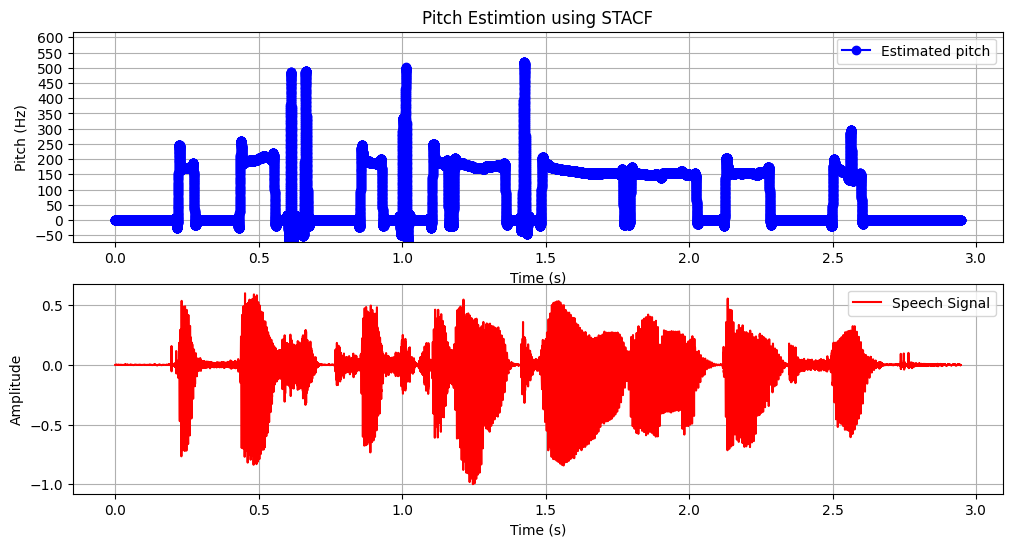

./audio/H.22.16k.wav
(47126,)
16000
Campioni di pitch: 587
Campioni che rientrano in MALE: 190
Campioni che rientrano in FEMALE: 178
Campioni che rientrano in CHILD: 219
The voice is: Child


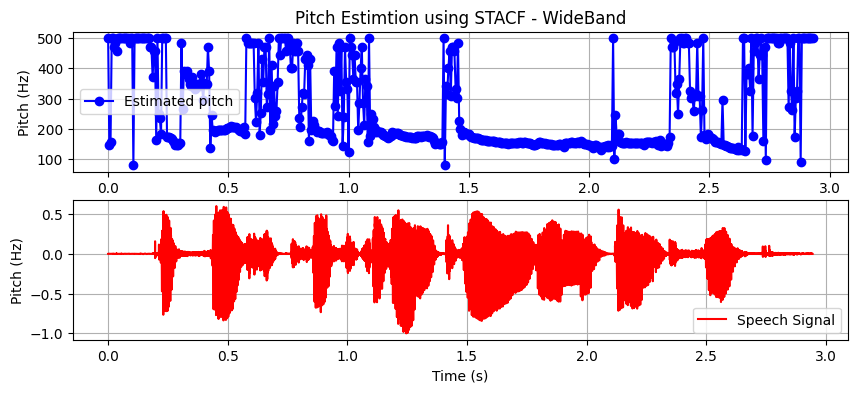

In [36]:
VUSPitch(filename='./audio/H.22.16k.wav')
PitchDiscriminator(filename='./audio/H.22.16k.wav')

./audio/speech2_10k.wav
(20006,)
10000
Campioni di pitch: 109
Campioni che rientrano in MALE: 70
Campioni che rientrano in FEMALE: 31
Campioni che rientrano in CHILD: 8
The voice is: Adult Male


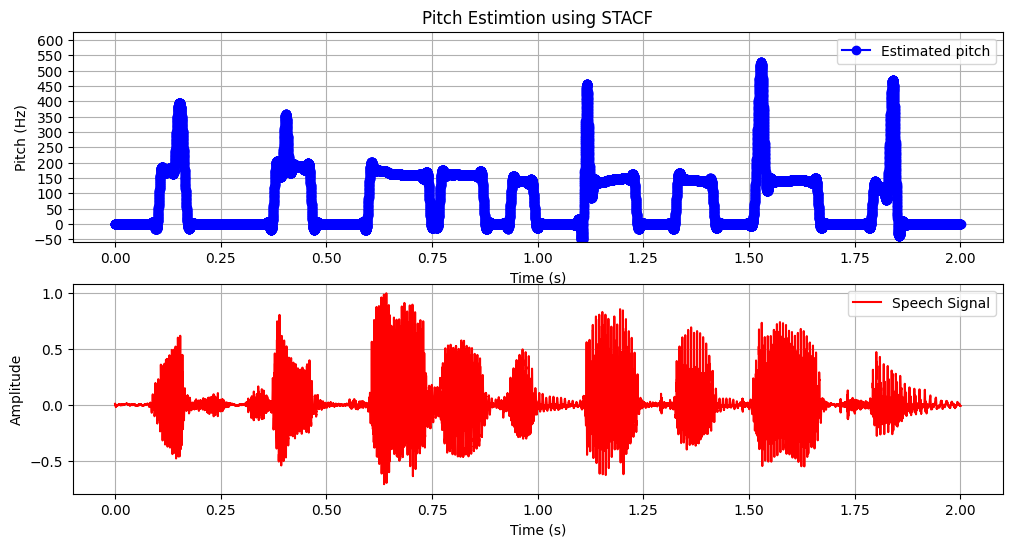

./audio/speech2_10k.wav
(20006,)
10000
Campioni di pitch: 248
Campioni che rientrano in MALE: 137
Campioni che rientrano in FEMALE: 59
Campioni che rientrano in CHILD: 52
The voice is: Adult Male


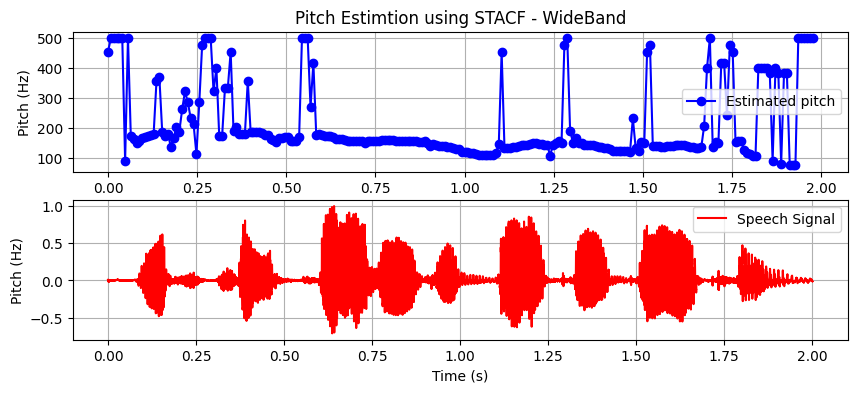

In [37]:
VUSPitch(filename='./audio/speech2_10k.wav')
PitchDiscriminator(filename='./audio/speech2_10k.wav')

./audio/speech3_10k.wav
(24006,)
10000
Campioni di pitch: 170
Campioni che rientrano in MALE: 53
Campioni che rientrano in FEMALE: 117
Campioni che rientrano in CHILD: 0
The voice is: Adult Female


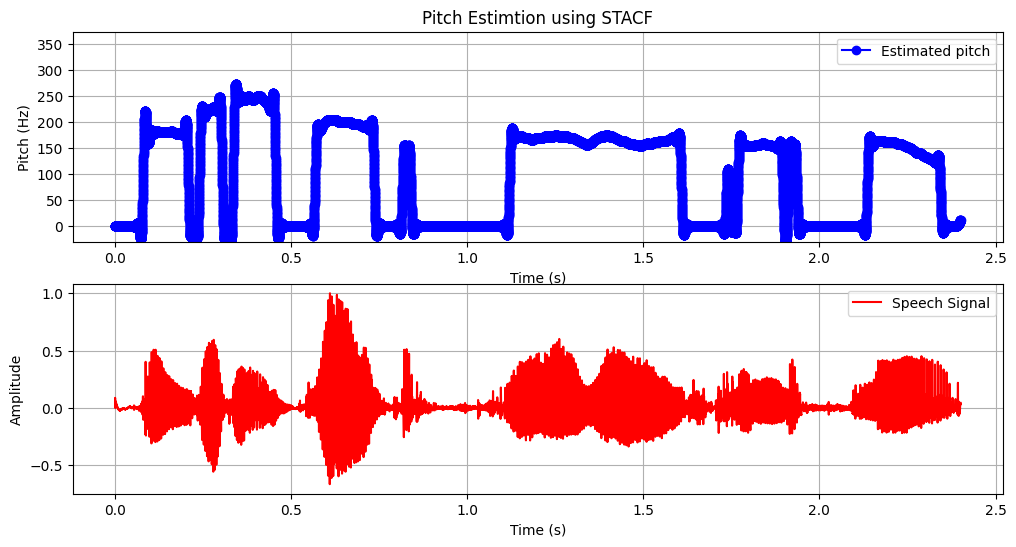

./audio/speech3_10k.wav
(24006,)
10000
Campioni di pitch: 298
Campioni che rientrano in MALE: 94
Campioni che rientrano in FEMALE: 175
Campioni che rientrano in CHILD: 29
The voice is: Adult Female


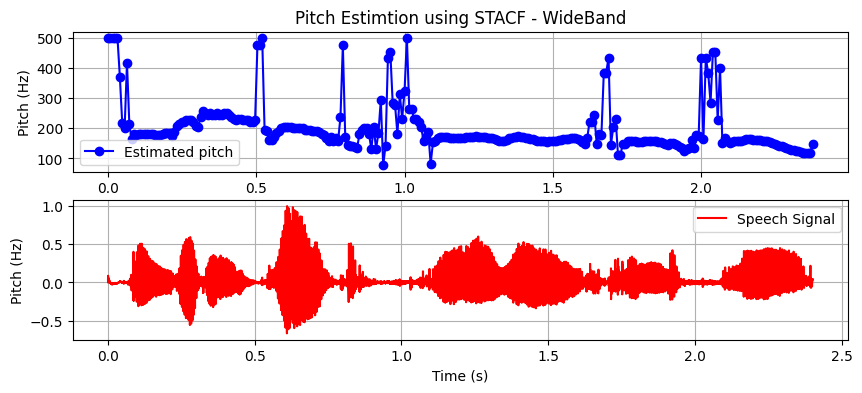

In [38]:
VUSPitch(filename='./audio/speech3_10k.wav')
PitchDiscriminator(filename='./audio/speech3_10k.wav')

./audio/arctic_a0049-sin.wav
(64000,)
16000
Campioni di pitch: 227
Campioni che rientrano in MALE: 21
Campioni che rientrano in FEMALE: 29
Campioni che rientrano in CHILD: 177
The voice is: Child


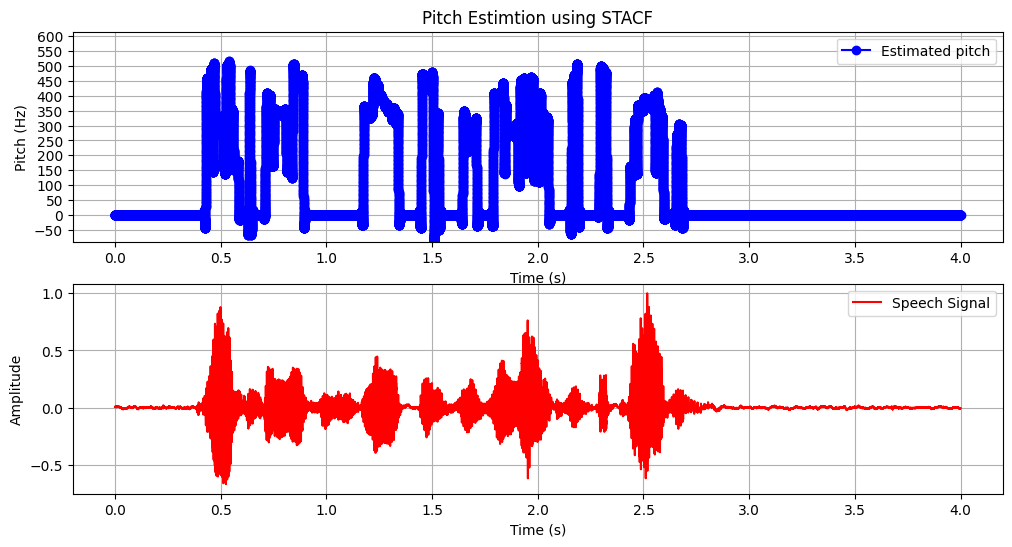

./audio/arctic_a0049-sin.wav
(64000,)
16000
Campioni di pitch: 797
Campioni che rientrano in MALE: 98
Campioni che rientrano in FEMALE: 107
Campioni che rientrano in CHILD: 592
The voice is: Child


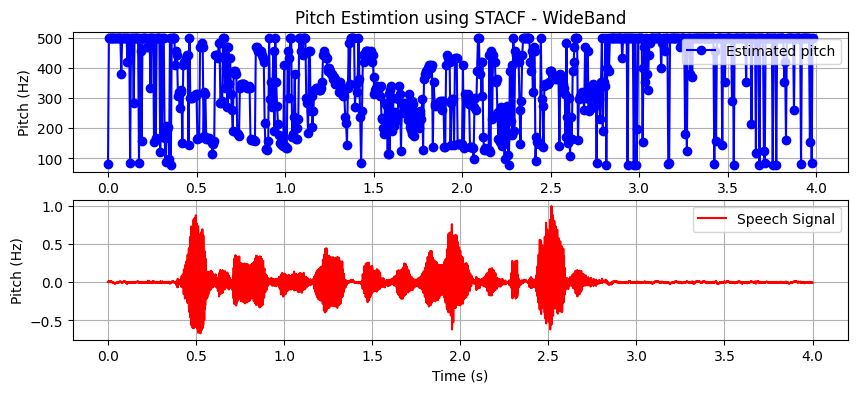

In [39]:
VUSPitch(filename='./audio/arctic_a0049-sin.wav')
PitchDiscriminator(filename='./audio/arctic_a0049-sin.wav')

1.wav
(62362,)
16000
Campioni di pitch: 333
Campioni che rientrano in MALE: 1
Campioni che rientrano in FEMALE: 250
Campioni che rientrano in CHILD: 82
The voice is: Adult Female


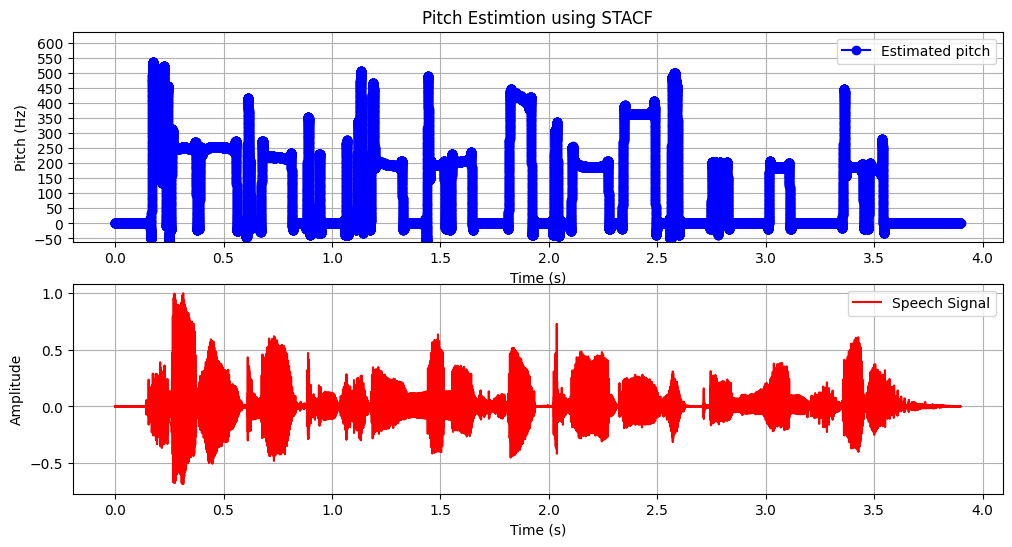

1.wav
(62362,)
16000
Campioni di pitch: 777
Campioni che rientrano in MALE: 15
Campioni che rientrano in FEMALE: 488
Campioni che rientrano in CHILD: 274
The voice is: Adult Female


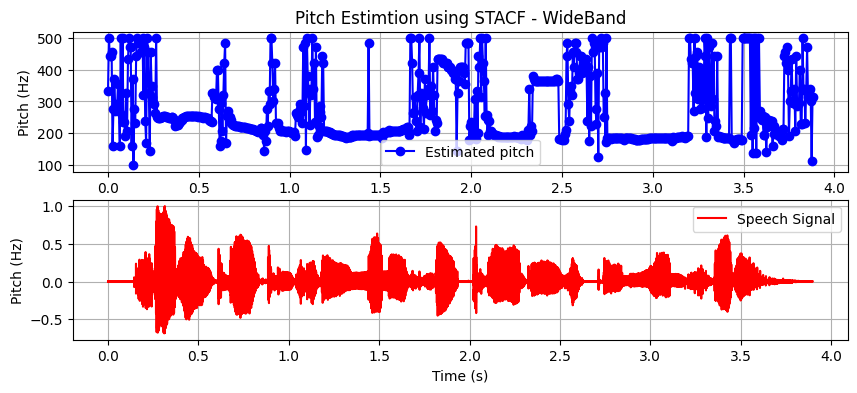

In [40]:
VUSPitch(filename='1.wav')
PitchDiscriminator(filename='1.wav')

Tramite l'utilizzo di un pitch detector migliorato con VUS riusciamo ad avere delle stime molto più "precise"